In [1]:
## 

In [19]:
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

import pvlib
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.tri as tri
import os



## Merging Turbidity data from BAWs Untrim data set with Johannes' SCHISM grid



### BAW data

In [3]:
baw = Dataset('/scratch/local1/baw/f.AZHel_FT_REF.2D.cut.nc', 'r')

In [4]:
# _ = [print(item) for item in baw.variables.keys()]

In [5]:
baw_face_x = baw.variables['Mesh2_face_x'][:]
baw_face_y = baw.variables['Mesh2_face_y'][:]

baw_spm = baw.variables['Mesh2_face_Schwebstoffgehalt_2d']
baw_spm = np.average(baw_spm[:, 0, 0, :], axis=0)

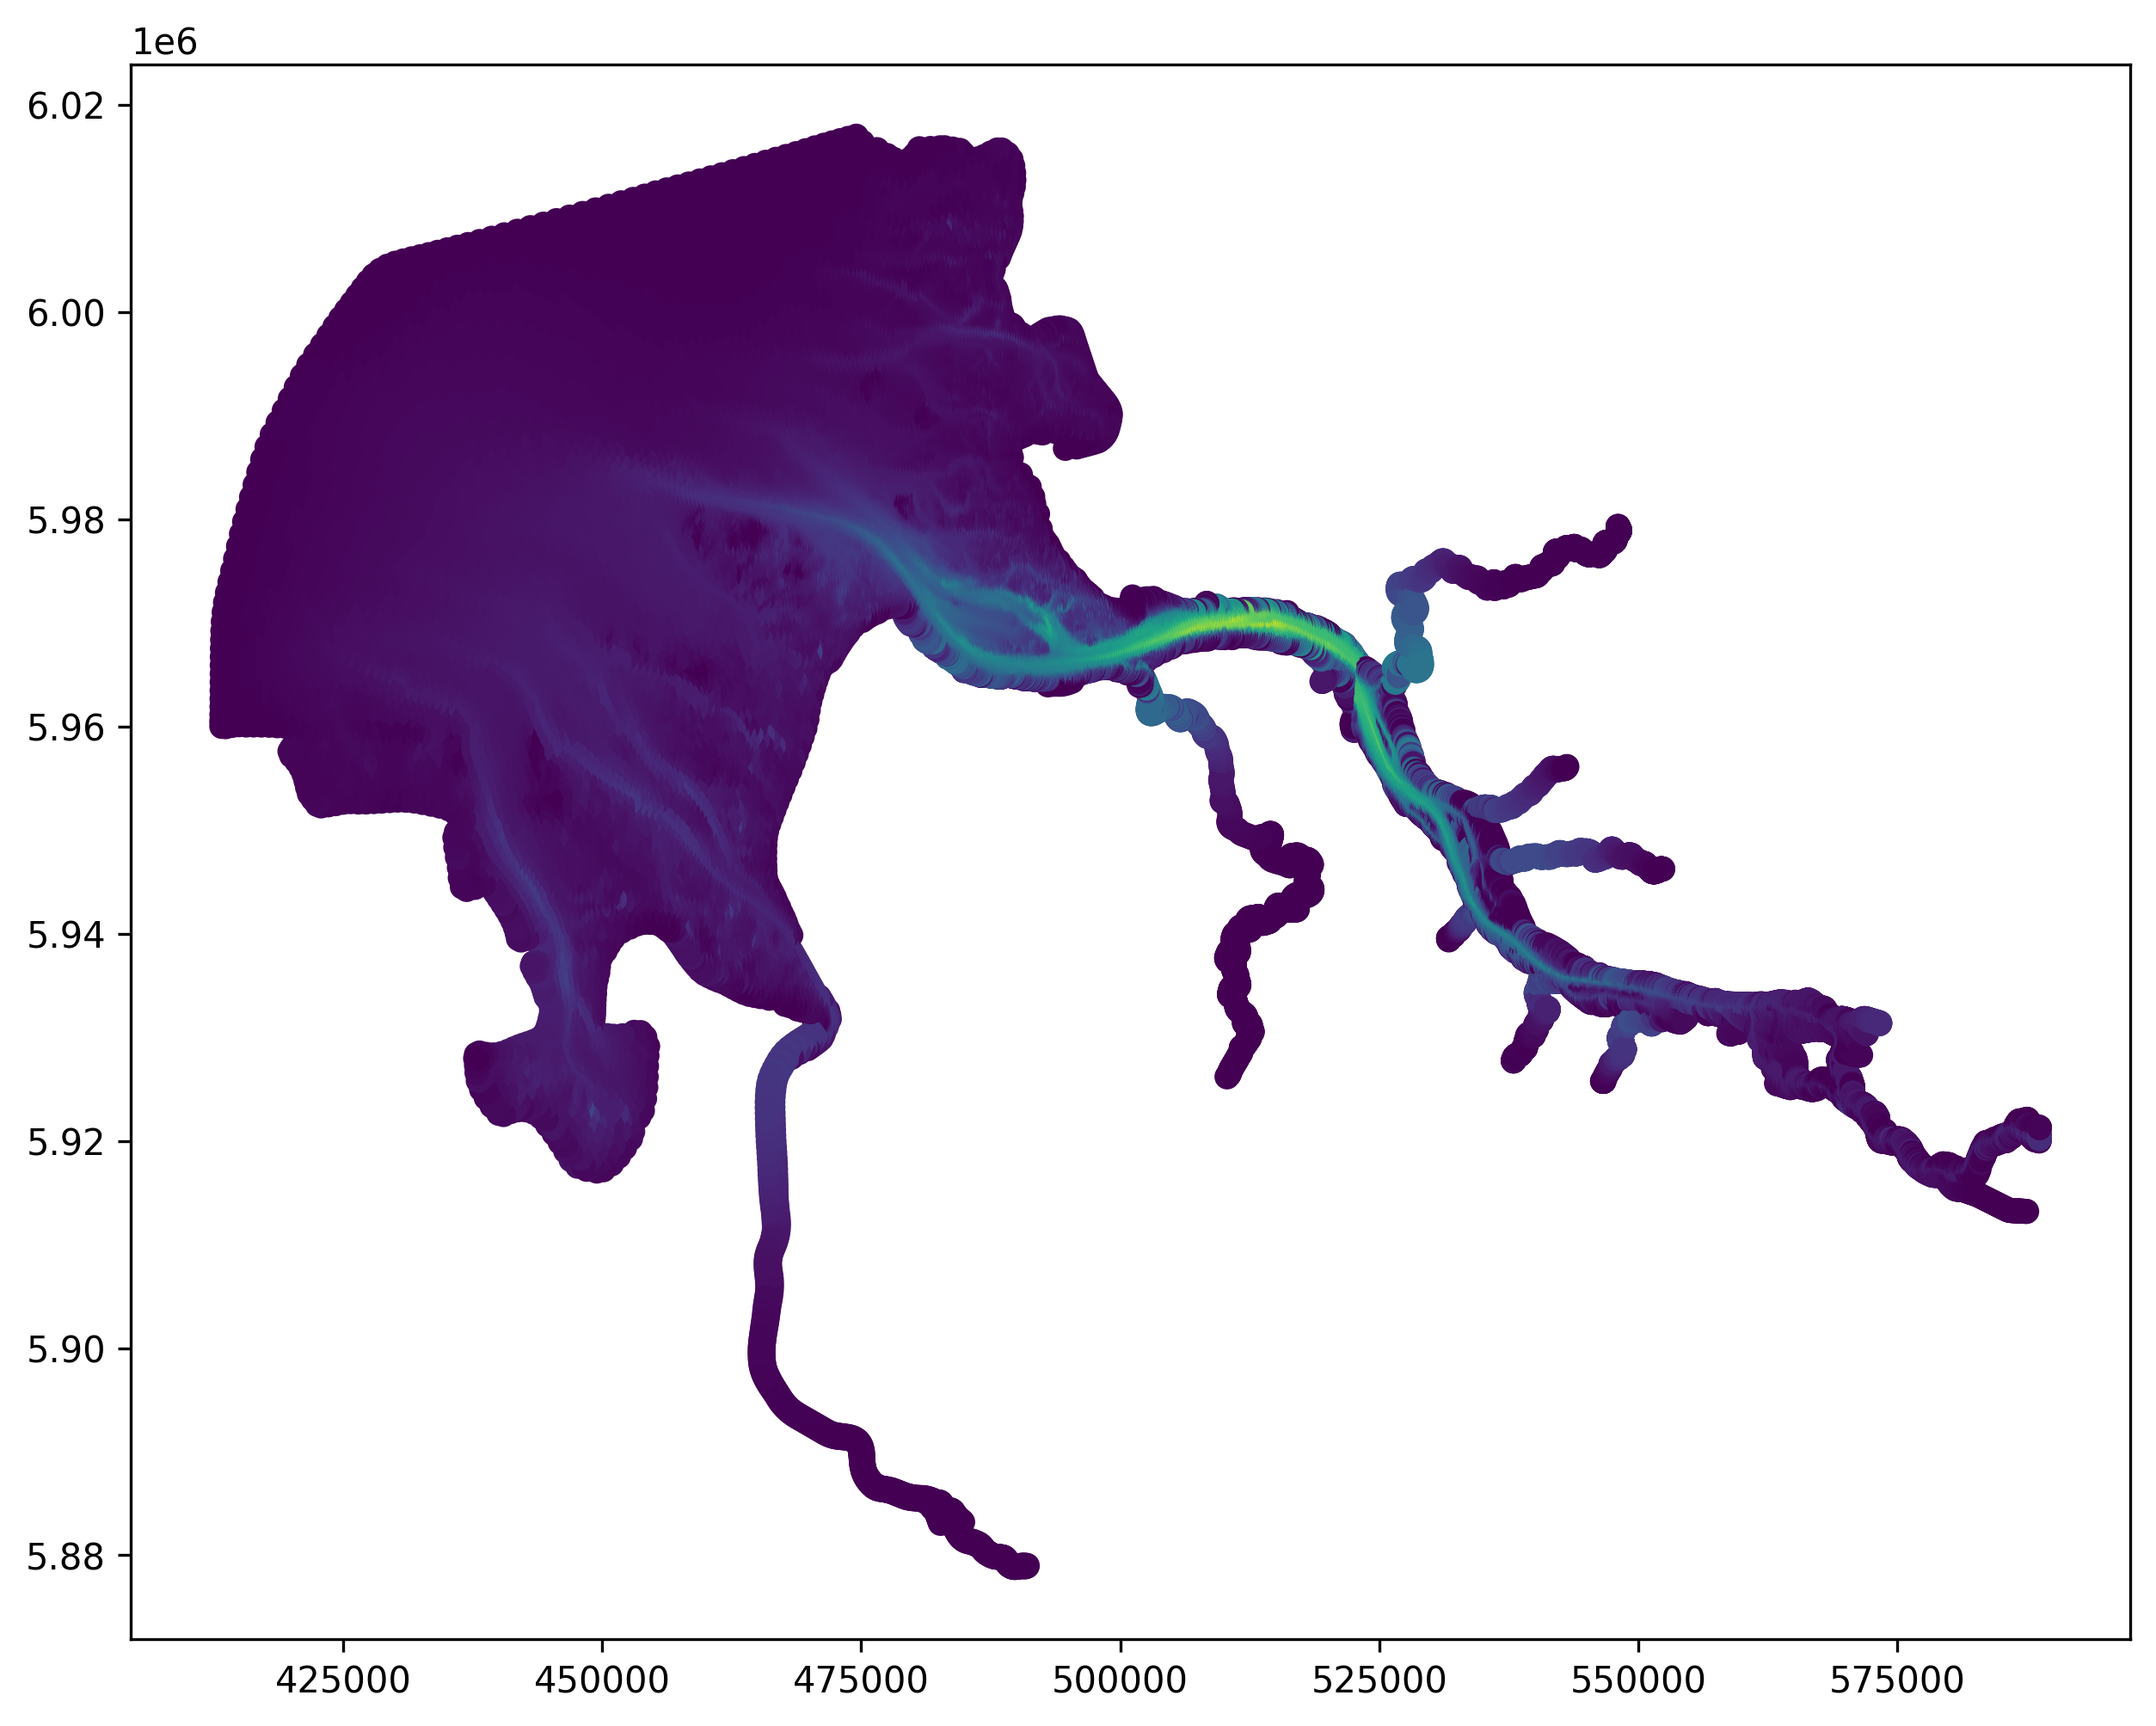

In [6]:
fig,ax = plt.subplots(figsize=(10,10),dpi=300)
ax.scatter(baw_face_x, baw_face_y, c=baw_spm, cmap='viridis')
ax.set_aspect('equal')

### HZG data

In [7]:
hzg = Dataset('/scratch/local1/output/22_11_01_depth_losses_v10/22_11_01_depth_losses_v10_grid.nc', 'r')

In [8]:
_ = [print(item) for item in hzg.variables.keys()]

x
triangles
triangle_area
adjacency
node_type
is_boundary_triangle
water_depth


In [9]:

hzg_node_x = hzg.variables['x'][:,0]
hzg_node_y = hzg.variables['x'][:,1]

hzg_tri = hzg.variables['triangles'][:]

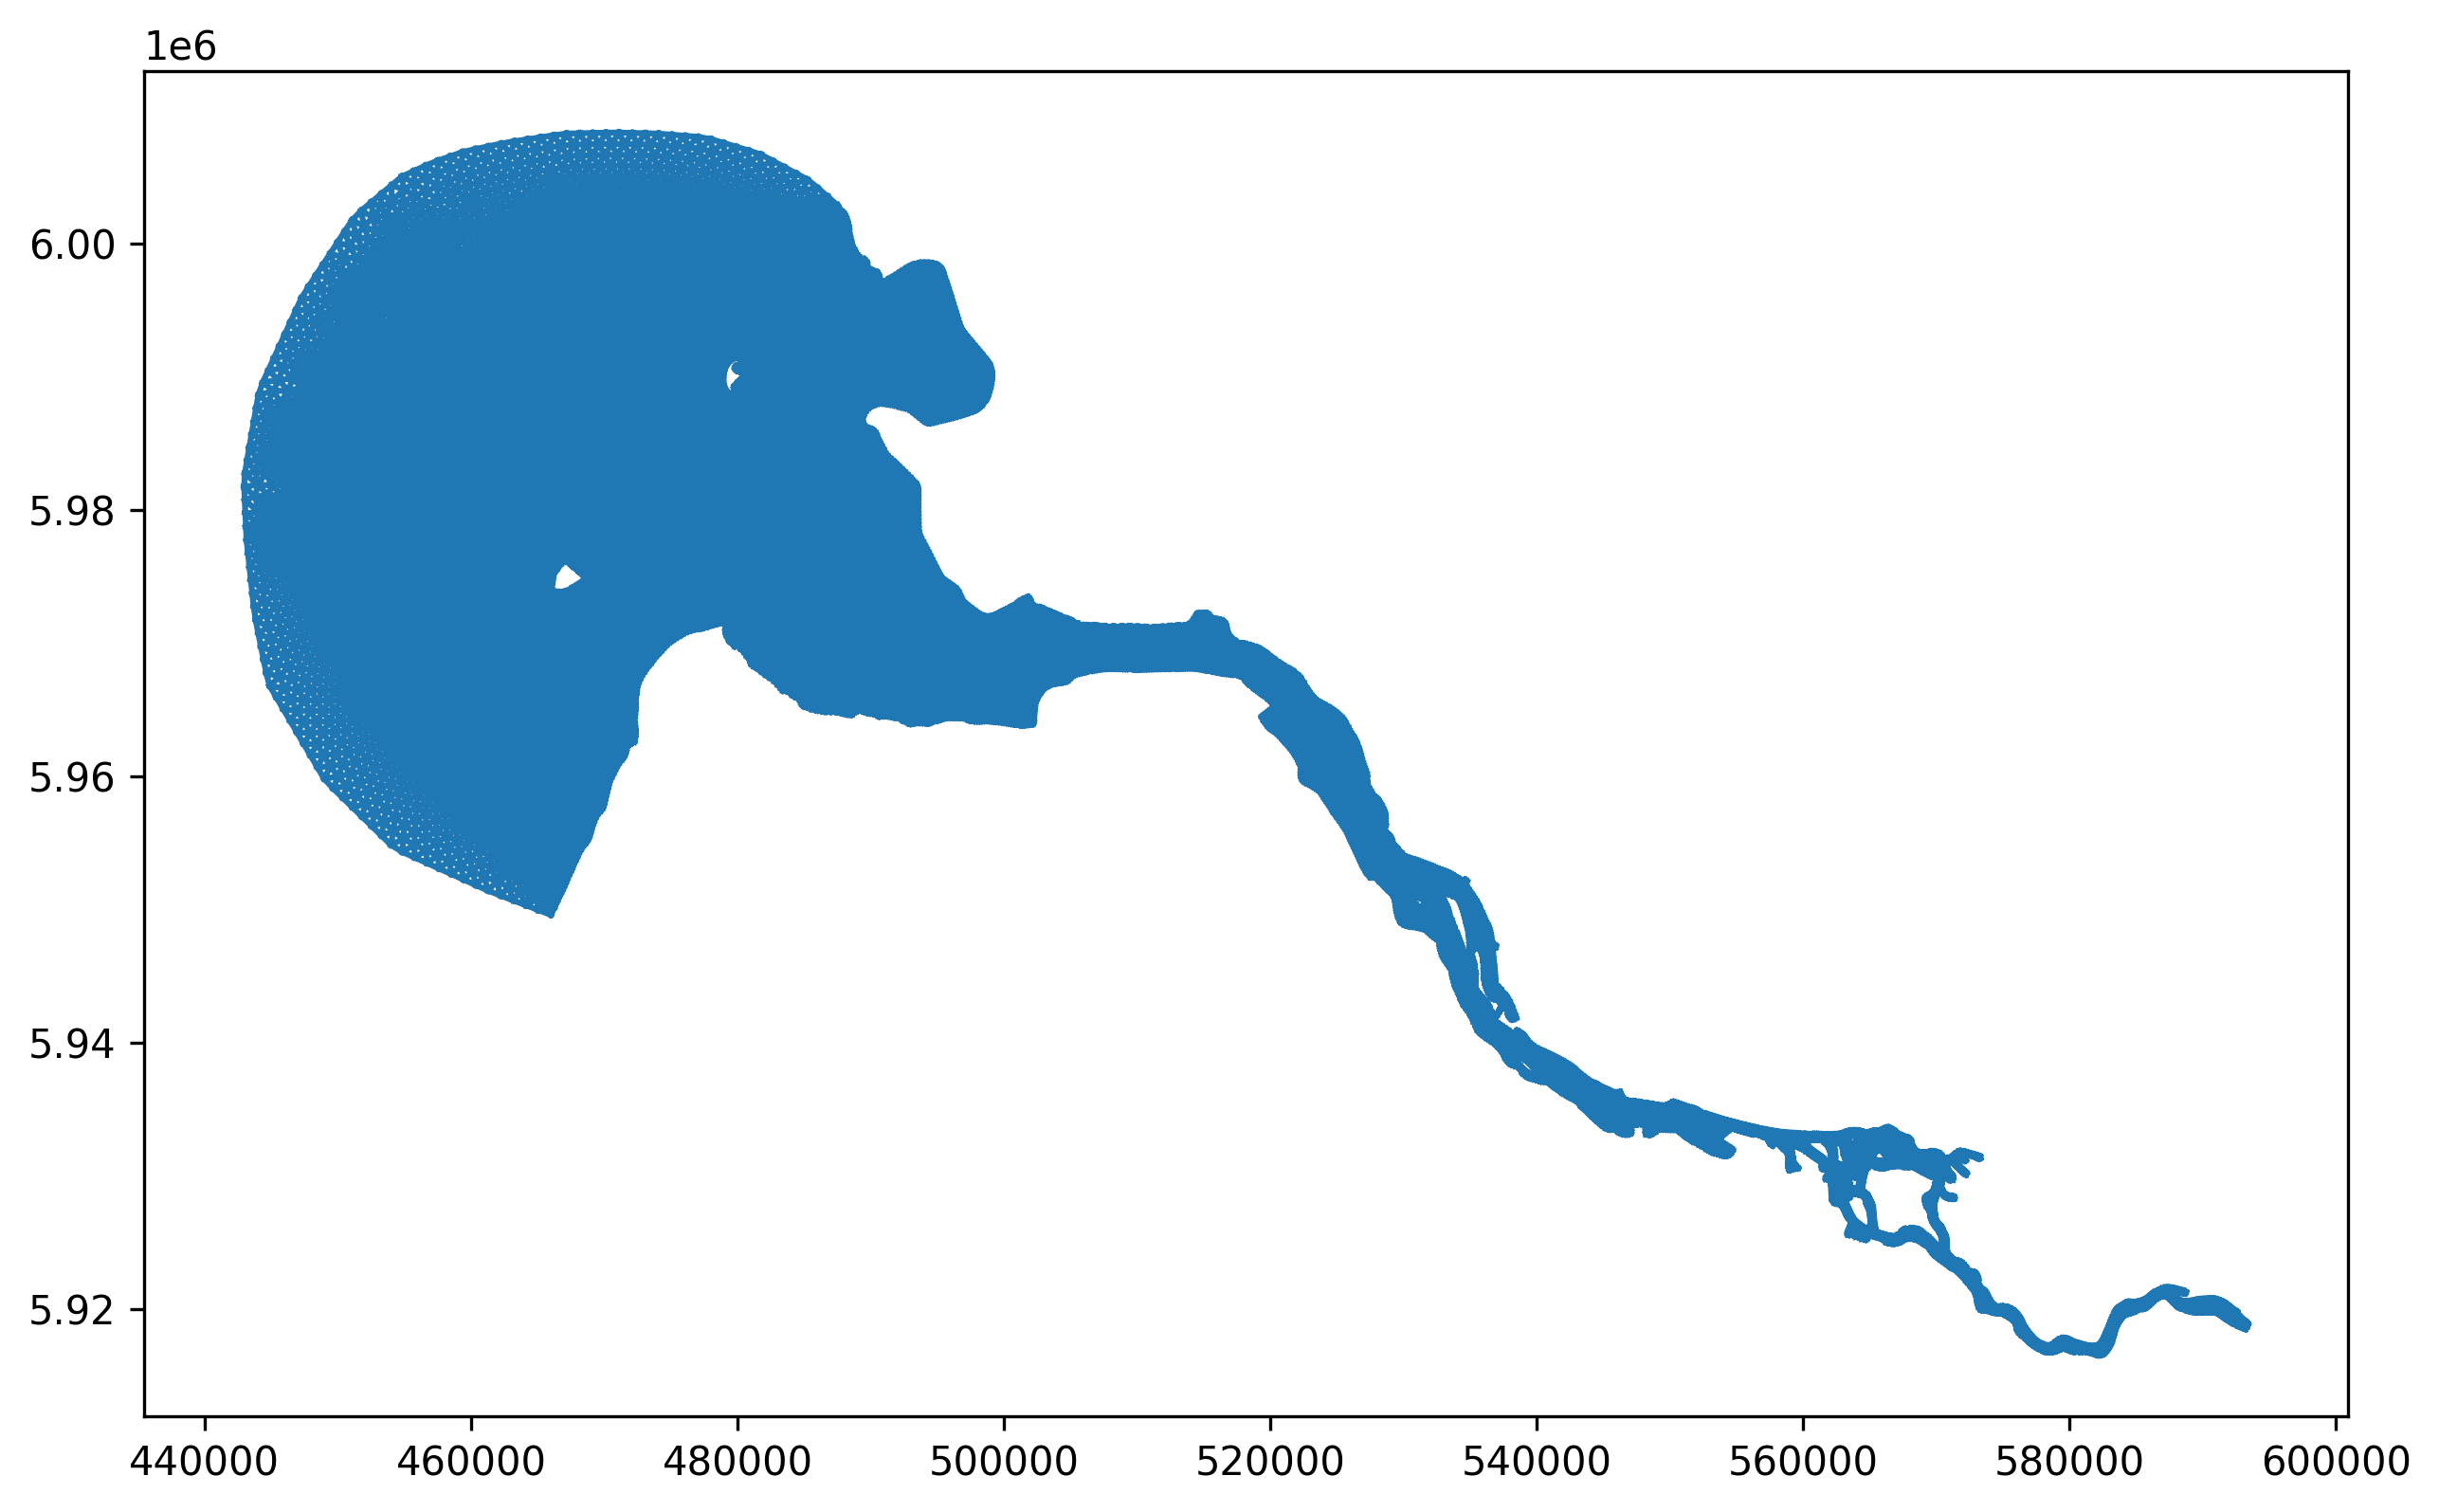

In [10]:
fig,ax = plt.subplots(figsize=(10,10),dpi=300)
ax.triplot(hzg_node_x, hzg_node_y, hzg_tri)
ax.set_aspect('equal')

### Interpolating and merging BAW data onto HZG grid

#### delaunay triangulation


#### griddata interpolation

In [11]:


# Create source points from baw data
source_points = np.array([baw_face_x, baw_face_y]).T

# Create target grid points from hzg data
target_points = np.array([hzg_node_x, hzg_node_y]).T

# Interpolate baw data onto hzg grid
interpolated_spm = griddata(source_points, baw_spm, target_points, method='linear')
# Note: The 'method' argument can be 'linear', 'nearest', or 'cubic'.


In [12]:
# set 0- where nan
interpolated_spm[np.isnan(interpolated_spm)] = 0

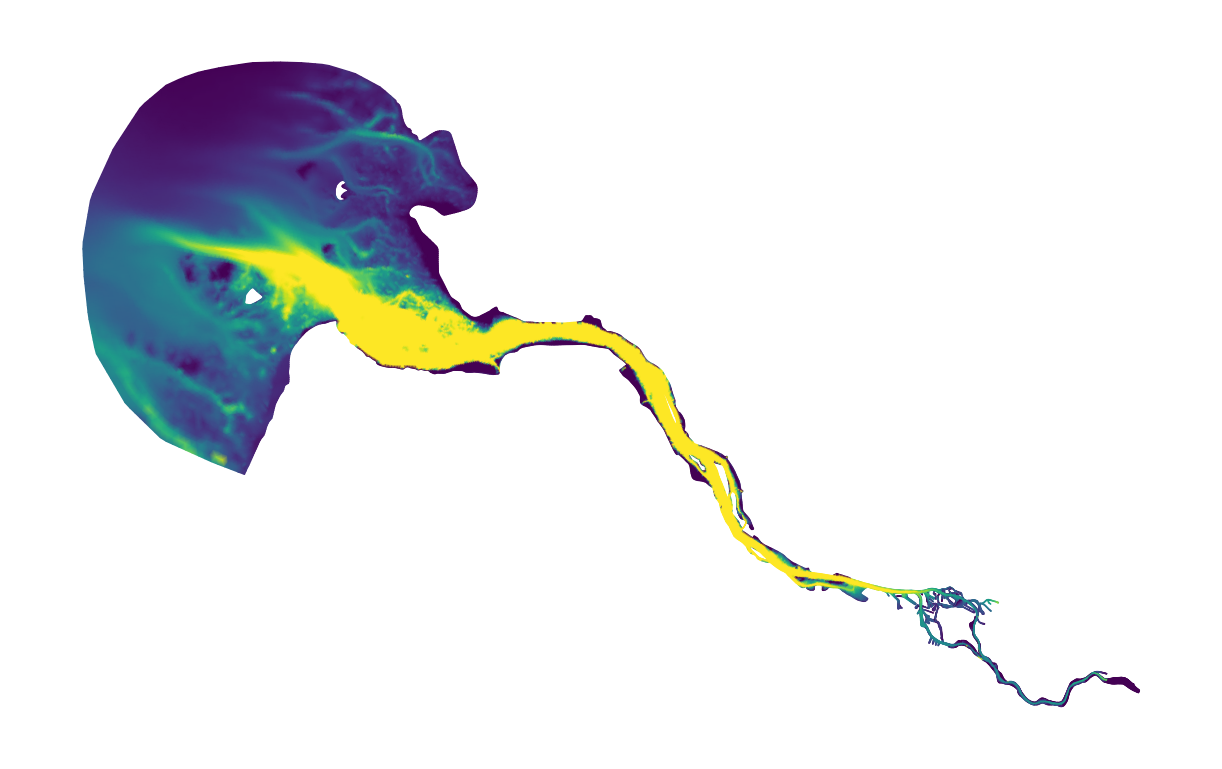

In [13]:
# %matplotlib widget

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.tripcolor(hzg_node_x, hzg_node_y, hzg_tri, interpolated_spm, cmap='viridis', shading='gouraud', vmax=0.05)
ax.set_aspect('equal')

# remove ticks and labels and spine
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [14]:
%matplotlib inline

In [15]:


# Create source points from baw data
source_points = np.array([baw_face_x, baw_face_y]).T

# Create target grid points from hzg data
target_points = np.array([hzg_node_x, hzg_node_y]).T

triangulation = tri.Triangulation(baw_face_x, baw_face_y)

# set masked values to 0
baw_spm_unmasked = np.ma.filled(baw_spm, 0)
interpolator = tri.LinearTriInterpolator(triangulation, baw_spm_unmasked)

# plot the tripcolor with baw spm
# %matplotlib widget
# fig, ax = plt.subplots()
# tcf = ax.tripcolor(triangulation, baw_spm_unmasked, shading='gouraud', cmap='viridis')
# ax.set_aspect('equal')

# interpolate baw spm to hzg grid
hzg_spm = interpolator(hzg_node_x, hzg_node_y)




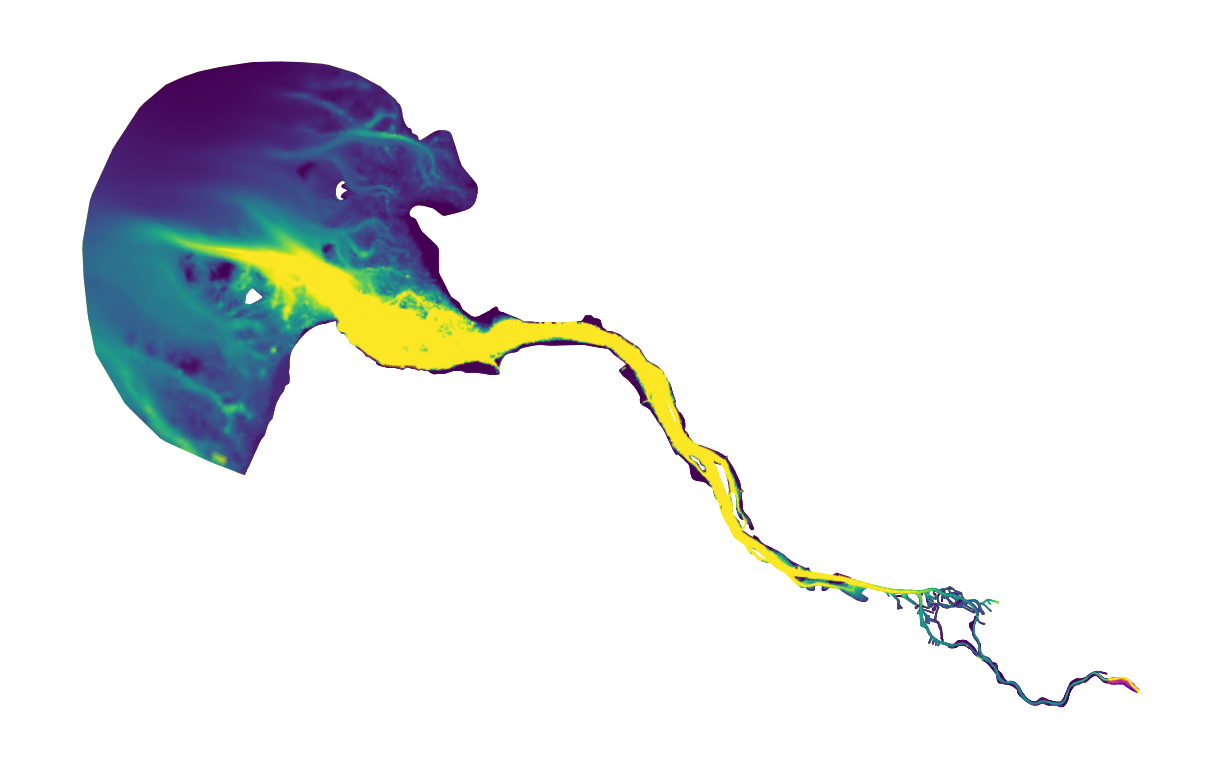

In [16]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.tripcolor(hzg_node_x, hzg_node_y, hzg_tri, hzg_spm, cmap='viridis', shading='gouraud', vmax=0.05,zorder=1)
ax.tripcolor(hzg_node_x, hzg_node_y, hzg_tri, hzg.variables['water_depth'], cmap='plasma', shading='gouraud', vmax=0.05,zorder=0)
ax.set_aspect('equal')

# remove ticks and labels and spine
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

## Creating a copy of the HZG dataset with the interpolated SPM values

In [3]:
# for safety make folder and all files in folder read only for all
import os, stat
path_to_dir = '/scratch/local1/hzg'
for root, dirs, files in os.walk(path_to_dir):
    for momo in dirs:
        os.chmod(os.path.join(root, momo), stat.S_IRUSR | stat.S_IRGRP | stat.S_IROTH | stat.S_IXUSR | stat.S_IXGRP | stat.S_IXOTH)
    for momo in files:
        os.chmod(os.path.join(root, momo), stat.S_IRUSR | stat.S_IRGRP | stat.S_IROTH)


In [36]:
# copy files from hzg to hzg2 and 

import shutil

path_to_dir = '/scratch/local1/hzg'
path_to_dir2 = '/scratch/local1/hzg2'


for root, dirs, files in os.walk(path_to_dir):
    n_files = len(files)
    for momo in dirs:
        os.makedirs(os.path.join(path_to_dir2, momo))
    for ii,momo in enumerate(files):
        print(f'( {ii+1} / {n_files} )')
        shutil.copy(os.path.join(root, momo), path_to_dir2)



( 1 / 368 )
( 2 / 368 )
( 3 / 368 )
( 4 / 368 )
( 5 / 368 )
( 6 / 368 )
( 7 / 368 )
( 8 / 368 )
( 9 / 368 )
( 10 / 368 )
( 11 / 368 )
( 12 / 368 )
( 13 / 368 )
( 14 / 368 )
( 15 / 368 )
( 16 / 368 )
( 17 / 368 )
( 18 / 368 )
( 19 / 368 )
( 20 / 368 )
( 21 / 368 )
( 22 / 368 )
( 23 / 368 )
( 24 / 368 )
( 25 / 368 )
( 26 / 368 )
( 27 / 368 )


KeyboardInterrupt: 

## Adding turbidity

In [17]:
# make files in hzg2 writeable

path_to_dir = '/scratch/local1/hzg2'
for root, dirs, files in os.walk(path_to_dir):
    for momo in dirs:
        os.chmod(os.path.join(root, momo), stat.S_IRUSR | stat.S_IRGRP | stat.S_IROTH | stat.S_IWUSR | stat.S_IWGRP | stat.S_IWOTH)
    for momo in files:
        os.chmod(os.path.join(root, momo), stat.S_IRUSR | stat.S_IRGRP | stat.S_IROTH | stat.S_IWUSR | stat.S_IWGRP | stat.S_IWOTH)

NameError: name 'os' is not defined

In [21]:
import netCDF4 as nc

# Define your turbidity data - for this example, I'm just creating dummy data.
# In reality, you should replace this with your actual turbidity data.
turbidity_data = interpolated_spm

path_to_dir2 = '/scratch/local1/hzg2'

for root, dirs, files in os.walk(path_to_dir2):
    n_files = len(files)
    for ii,momo in enumerate(files):
        if momo.endswith('.nc'):
            print(momo, f'( {ii+1} / {n_files} )')
            with nc.Dataset(os.path.join(root, momo), 'a') as ds:
                # Ensure the dimension exists
                if 'nSCHISM_hgrid_node' not in ds.dimensions:
                    raise ValueError("The dimension 'nSCHISM_hgrid_node' does not exist in the file.")

                # Check if turbidity variable already exists, if not, create it
                if 'turbidity' not in ds.variables:
                    turbidity_var = ds.createVariable('turbidity', 'f4', ('nSCHISM_hgrid_node',))

                    # Assign the turbidity data to the variable
                    turbidity_var[:] = turbidity_data

                    # If needed, set attributes for the turbidity variable
                    turbidity_var.units = 'kg/l'  # Adjust this as necessary
                    turbidity_var.long_name = 'Water Turbidity'
                    # add description
                    turbidity_var.description = 'Turbidity based on BAW data from Arne Hammrich. Average of 3D data over time and depth'




schout_272.nc ( 1 / 367 )
schout_111.nc ( 2 / 367 )
schout_199.nc ( 3 / 367 )
schout_197.nc ( 4 / 367 )
schout_156.nc ( 5 / 367 )
schout_171.nc ( 6 / 367 )
schout_63.nc ( 7 / 367 )
schout_116.nc ( 8 / 367 )
schout_252.nc ( 9 / 367 )
schout_113.nc ( 10 / 367 )
schout_294.nc ( 11 / 367 )
schout_140.nc ( 12 / 367 )
schout_73.nc ( 13 / 367 )
schout_91.nc ( 14 / 367 )
schout_350.nc ( 15 / 367 )
schout_185.nc ( 16 / 367 )
schout_139.nc ( 17 / 367 )
schout_95.nc ( 18 / 367 )
schout_179.nc ( 19 / 367 )
schout_158.nc ( 20 / 367 )
schout_92.nc ( 21 / 367 )
schout_354.nc ( 22 / 367 )
schout_321.nc ( 23 / 367 )
schout_285.nc ( 24 / 367 )
schout_60.nc ( 25 / 367 )
schout_2.nc ( 26 / 367 )
schout_284.nc ( 27 / 367 )
schout_307.nc ( 28 / 367 )
schout_226.nc ( 29 / 367 )
schout_24.nc ( 30 / 367 )
schout_65.nc ( 31 / 367 )
schout_250.nc ( 32 / 367 )
schout_155.nc ( 33 / 367 )
schout_127.nc ( 34 / 367 )
schout_132.nc ( 35 / 367 )
schout_175.nc ( 36 / 367 )
schout_47.nc ( 37 / 367 )
schout_86.nc ( 38 / 3